In [43]:
import os
import random
import math
import json
import time
import pandas as pd
import numpy as np
import copy as copy
import matplotlib.pyplot as plt
import translators as ts
import translators.server as tss
from translate import Translator
from pandas import Timestamp
from datetime import datetime
from os import getcwd
from os.path import join
%matplotlib inline


In [44]:
# Load World Mortality Data
path = join(getcwd().rstrip('src'),
            'data/world_mortality.csv').replace('\\', '/')
DF = pd.read_csv(path)
DF.rename(columns={'country_name': 'country'}, inplace=True)

# Separate Data by Year
DF_Regular = DF[DF.year < 2020]
DF_2020 = DF[(DF.year == 2020)]
DF_2021 = DF[(DF.year == 2021)]
DF_2022 = DF[(DF.year == 2022)]

# Data for 2015-2019
Regular = DF_Regular.groupby('country').mean().reset_index()
Regular['AverageAnnualUnitCount'] = round(Regular.time * 2 - 1, 0)
tmp = copy.copy(DF)
time_unit_dict = {'monthly': 12, 'weekly': 52}
tmp['AnnualUnitCount'] = [time_unit_dict[x] for x in tmp.time_unit]
tmp = tmp.groupby('country').mean().reset_index()[
    ['country', 'AnnualUnitCount']]
Regular = pd.merge(Regular, tmp, on='country')
Regular['deaths'] = Regular.deaths * Regular.AnnualUnitCount
Regular = Regular[['country', 'deaths', 'AverageAnnualUnitCount']]

# Data for 2020
DF_2020 = DF_2020.groupby('country').mean().reset_index()
DF_2020['AverageAnnualUnitCount'] = round(DF_2020.time * 2 - 1, 0)
DF_2020 = pd.merge(DF_2020, tmp, on='country')
DF_2020['deaths'] = DF_2020.deaths * DF_2020.AnnualUnitCount
DF_2020 = DF_2020[['country', 'deaths', 'AverageAnnualUnitCount']]

# Data for 2021
DF_2021 = DF_2021.groupby('country').mean().reset_index()
DF_2021['AverageAnnualUnitCount'] = round(DF_2021.time * 2 - 1, 0)
DF_2021 = pd.merge(DF_2021, tmp, on='country')
DF_2021['deaths'] = DF_2021.deaths * DF_2021.AnnualUnitCount
DF_2021 = DF_2021[['country', 'deaths', 'AverageAnnualUnitCount']]

# Data for 2022
DF_2022 = DF_2022.groupby('country').mean().reset_index()
DF_2022['AverageAnnualUnitCount'] = round(DF_2022.time * 2 - 1, 0)
DF_2022 = pd.merge(DF_2022, tmp, on='country')
DF_2022['deaths'] = DF_2022.deaths * DF_2022.AnnualUnitCount
DF_2022 = DF_2022[['country', 'deaths', 'AverageAnnualUnitCount']]

# Merge Data (2015-2019, 2020, 2021, 2022)
# newDF = pd.concat([Regular, DF_2020[['deaths']],
#                   DF_2021[['deaths']], DF_2022[['deaths']]], axis=1)
# newDF.columns = ['country', 'RegularDeaths',
#                  'RegularAverageAnnualUnitCount', '2020Deaths', '2021Deaths', '2022Deaths']
# newDF = newDF.reindex(['country', 'RegularAverageAnnualUnitCount', 'RegularDeaths',
#                        '2020Deaths', '2021Deaths', '2022Deaths'], axis='columns')


C:\Users\dachu\AppData\Local\Temp\ipykernel_8520\2905204980.py:14: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Regular = DF_Regular.groupby('country').mean().reset_index()
C:\Users\dachu\AppData\Local\Temp\ipykernel_8520\2905204980.py:19: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tmp = tmp.groupby('country').mean().reset_index()[
C:\Users\dachu\AppData\Local\Temp\ipykernel_8520\2905204980.py:26: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should

In [45]:
DF_2020.rename(columns={'deaths': '2020Deaths'}, inplace=True)
DF_2021.rename(columns={'deaths': '2021Deaths'}, inplace=True)
DF_2022.rename(columns={'deaths': '2022Deaths'}, inplace=True)
# DF_2020.head()
newDF = pd.merge(Regular, DF_2020[['country', '2020Deaths']], on='country')
newDF = pd.merge(newDF, DF_2021[['country', '2021Deaths']], on='country')
newDF = pd.merge(newDF, DF_2022[['country', '2022Deaths']], on='country')

newDF['Excess2020'] = newDF['2020Deaths'] - newDF['deaths']
newDF['Excess2021'] = newDF['2021Deaths'] - newDF['deaths']
newDF['Excess2022'] = newDF['2022Deaths'] - newDF['deaths']

# newDF['X'] = newDF['Excess2020'] + newDF['Excess2021']
# newDF['Y'] = newDF['Excess2022'] / newDF['X']



newDF.head()
newDF[newDF.country == 'Monaco']

,country,deaths,AverageAnnualUnitCount,2020Deaths,2021Deaths,2022Deaths,Excess2020,Excess2021,Excess2022
54,Monaco,527.8,12.0,521.0,593.0,512.0,-6.8,65.2,-15.8


In [46]:
path = join(getcwd().rstrip('src'),
            'data/owid-covid-data.csv').replace('\\', '/')
data = pd.read_csv(path)
data = data[['location', 'population']]
data.rename(columns={'location': 'country'}, inplace=True)
data.groupby('country').count().sort_values(by='population', ascending=False)
data.drop_duplicates(subset=['country'], inplace=True)
data.reset_index(drop=True, inplace=True)
data.head()
newDF = pd.merge(newDF, data, on='country')
newDF.head()

,country,deaths,AverageAnnualUnitCount,2020Deaths,2021Deaths,2022Deaths,Excess2020,Excess2021,Excess2022,population
0,Albania,21955.800000,12.0,27605.000000,30580.0,25708.000000,5649.200000,8624.200000,3752.200000,2854710.0
1,Armenia,27047.400000,12.0,35371.000000,34638.0,27462.666667,8323.600000,7590.600000,415.266667,2790974.0
2,Australia,160378.360153,52.0,161595.396226,170960.0,190732.533333,1217.036073,10581.639847,30354.173180,25921089.0
3,Austria,81022.375479,52.0,89475.320755,89538.0,89276.571429,8452.945276,8515.624521,8254.195950,8922082.0
4,Azerbaijan,56430.800000,12.0,75647.000000,76878.0,62637.000000,19216.200000,20447.200000,6206.200000,10312992.0


In [47]:
newDF['Excess2020'] = newDF['Excess2020'] / newDF['population'] * 1000000
newDF['Excess2021'] = newDF['Excess2021'] / newDF['population'] * 1000000
newDF['Excess2022'] = newDF['Excess2022'] / newDF['population'] * 1000000
newDF.head()

,country,deaths,AverageAnnualUnitCount,2020Deaths,2021Deaths,2022Deaths,Excess2020,Excess2021,Excess2022,population
0,Albania,21955.800000,12.0,27605.000000,30580.0,25708.000000,1978.905038,3021.042418,1314.389202,2854710.0
1,Armenia,27047.400000,12.0,35371.000000,34638.0,27462.666667,2982.328033,2719.695705,148.789156,2790974.0
2,Australia,160378.360153,52.0,161595.396226,170960.0,190732.533333,46.951580,408.225127,1171.022297,25921089.0
3,Austria,81022.375479,52.0,89475.320755,89538.0,89276.571429,947.418470,954.443651,925.142355,8922082.0
4,Azerbaijan,56430.800000,12.0,75647.000000,76878.0,62637.000000,1863.300195,1982.664197,601.784623,10312992.0


In [48]:
newDF['X'] = newDF['Excess2020'] + newDF['Excess2021']
newDF['Y'] = newDF['Excess2022'] / newDF['X']
newDF.head()
newDF[newDF.country == 'Taiwan']

,country,deaths,AverageAnnualUnitCount,2020Deaths,2021Deaths,2022Deaths,Excess2020,Excess2021,Excess2022,population,X,Y
76,Taiwan,171317.0,12.0,173156.0,183732.0,206191.2,77.074886,520.328826,1461.623161,23859912.0,597.403712,2.446626


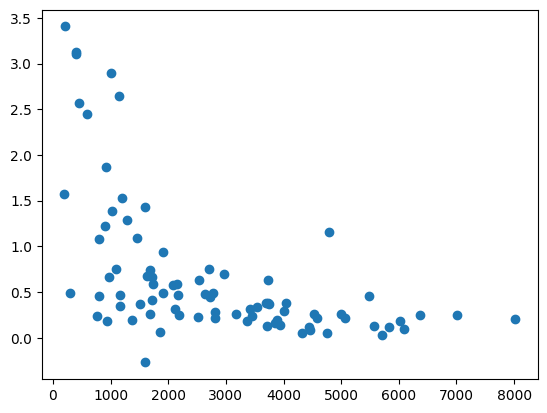

In [49]:
plt.scatter(newDF.X, newDF.Y)